In [ ]:
!python -m pip install pandas
!python -m pip install matplotlib
!python -m pip install seaborn 
!python -m pip install pickleshare


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%store -r df

In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-116064,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.010,Accident on FL-992 152nd St at Lincoln Blvd.,...,False,False,False,False,False,True,False,True,False,Day
1,A-116067,2,2016-11-30 15:16:19,2016-11-30 17:01:03,25.963093,-80.185677,NaN,NaN,0.010,Left turn lane blocked due to accident on FL-8...,...,False,False,False,False,False,False,False,True,False,Day
2,A-116068,2,2016-11-30 16:55:31,2016-11-30 17:25:11,25.841373,-80.322037,NaN,NaN,0.010,Queueing traffic due to accident on FL-826 Pal...,...,False,False,False,False,False,False,False,False,False,Day
3,A-116069,3,2016-11-30 16:57:23,2016-11-30 17:27:10,25.812199,-80.205856,NaN,NaN,0.010,Accident on I-95 Southbound at Exits 4 4B FL-1...,...,False,False,False,False,False,False,False,False,False,Day
4,A-116071,2,2016-11-30 17:15:52,2016-11-30 17:45:36,25.781235,-80.337181,NaN,NaN,0.010,Queueing traffic due to accident on FL-836 Dol...,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186912,A-7776983,2,2019-08-22 17:10:33,2019-08-22 17:38:17,25.707554,-80.285429,25.708083,-80.284736,0.057,At SR-959/Red Rd/57th Ave - Accident.,...,False,False,False,False,False,False,False,True,False,Day
186913,A-7776984,4,2019-08-22 17:12:48,2019-08-22 17:42:07,25.909390,-80.209870,25.912360,-80.209700,0.205,Ramp closed to 151st St/Exit 11 - Road closed ...,...,True,False,False,False,False,False,False,False,False,Day
186914,A-7777410,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,...,False,False,False,False,False,False,False,False,False,Night
186915,A-7777424,2,2019-08-23 13:08:31,2019-08-23 13:37:40,25.812250,-80.237460,25.812460,-80.243590,0.382,At SR-9/27th Ave/Unity Blvd - Accident. Right ...,...,True,False,False,False,False,False,False,False,False,Day


In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'County',
       'Zipcode', 'Country', 'Timezone', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

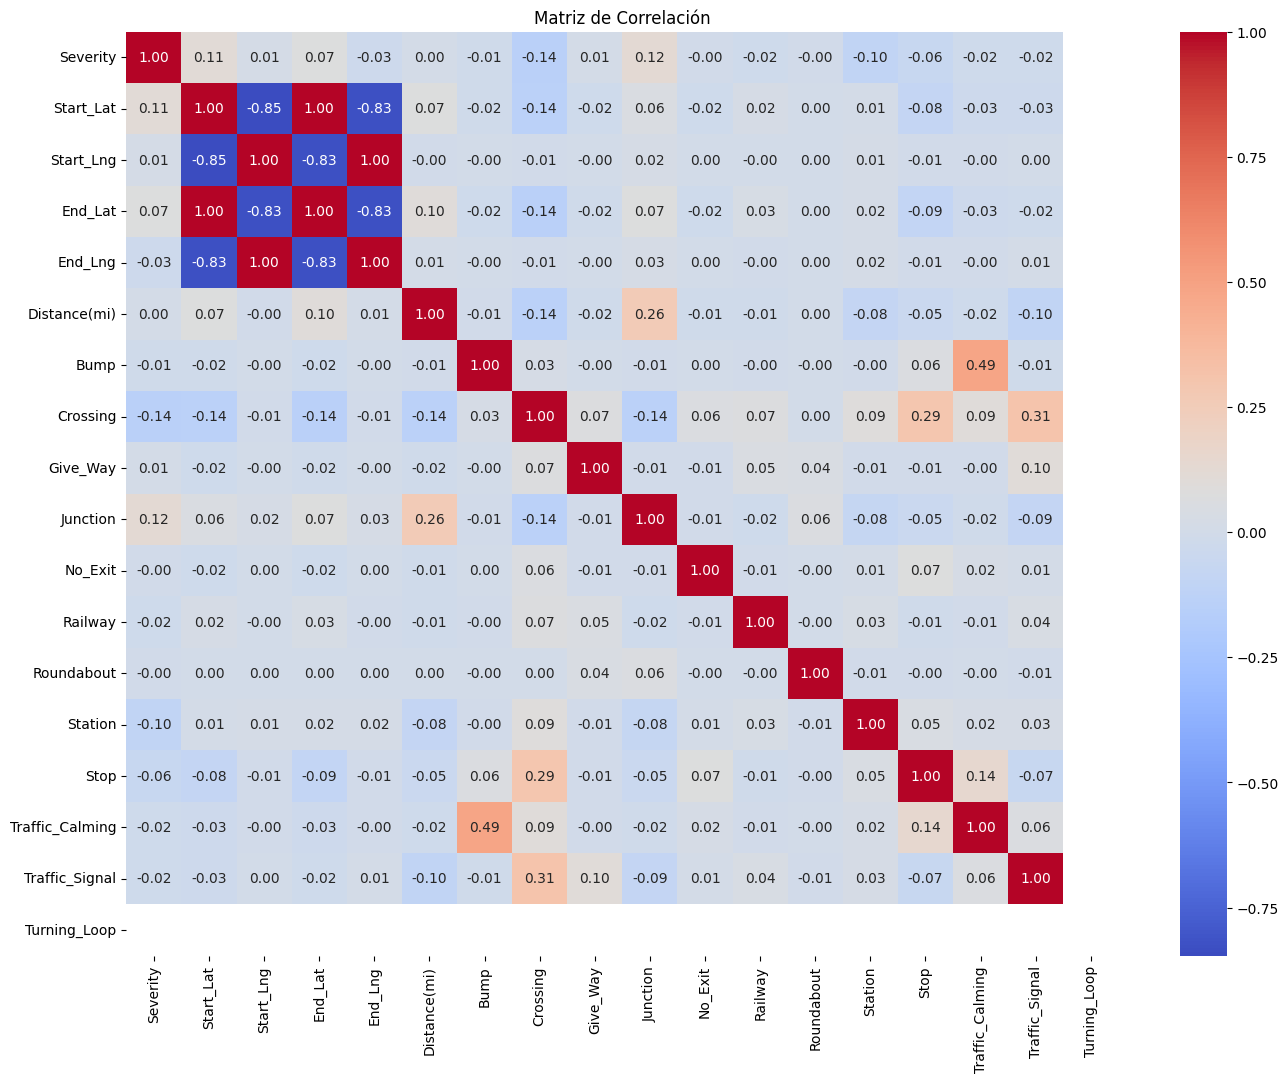

In [9]:
#Correlation matrix


# Boolean and numeric columns
columns_of_interest = ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# here we convert the boolean columns to numeric values 
df[columns_of_interest] = df[columns_of_interest].apply(lambda x: x.astype(int) if np.issubdtype(x.dtype, np.bool_) else x)

# Calculation of correlation matrix
corr_matrix = df[columns_of_interest].corr()


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


What we can se here is that the start coordinates (Start_Lat, Start_Lng) and end coordinates (End_Lat, End_Lng) of accidents have an almost perfect correlation, which makes sense if accidents tend to happen at a fixed point and do not involve large distances between starting and ending points.

The severity (Severity) does not seem to have a strong correlation with the other numerical variables in the matrix, as most of its values are close to 0.

There are some moderate correlations between location-related features and traffic conditions (like Crossing, Junction, Traffic_Signal), but again, they are relatively low.

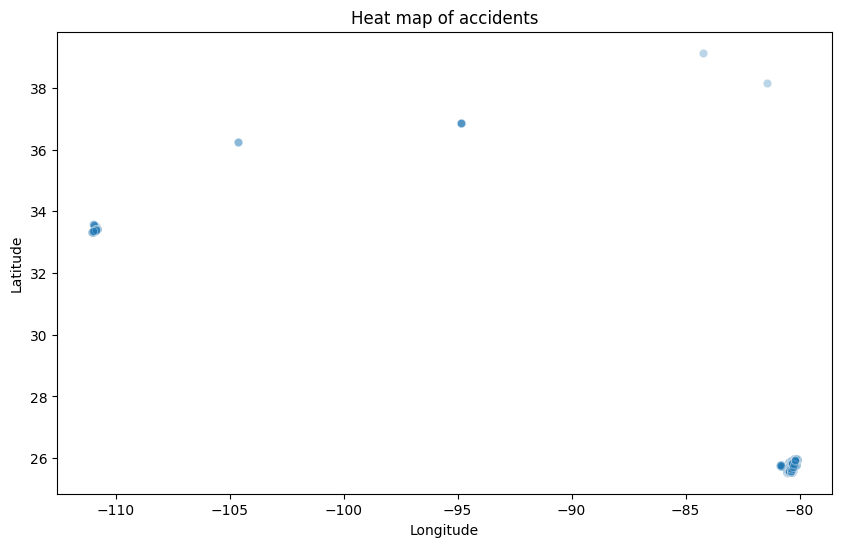

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', alpha=0.3, data=df)
plt.title('Heat map of accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Juliana\AppData\Local\Temp\ipykernel_25016\2108487508.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Start_Lng'], y=df['Start_Lat'], shade=True)


KeyboardInterrupt: 

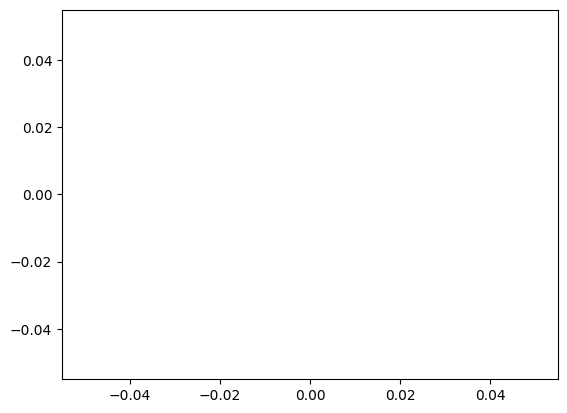

In [25]:
'''sns.kdeplot(x=df['Start_Lng'], y=df['Start_Lat'], shade=True)
plt.title('Heat Map of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.figure(figsize=(10, 6))
plt.show()'''
#this one takes too long maybe because of the dirty data


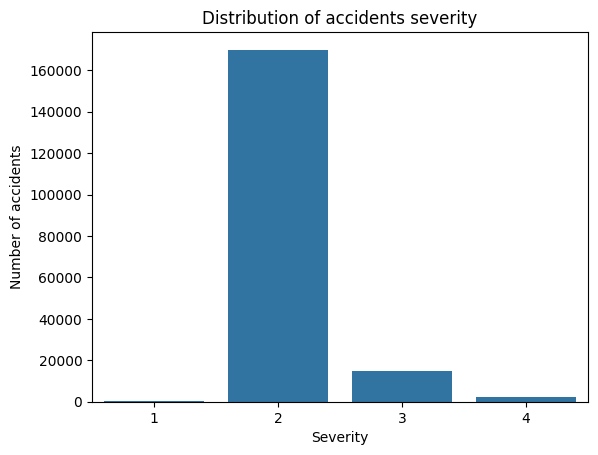

In [14]:
sns.countplot(x='Severity', data=df)
plt.title('Distribution of accidents severity')
plt.xlabel('Severity')
plt.ylabel('Number of accidents')
plt.show()


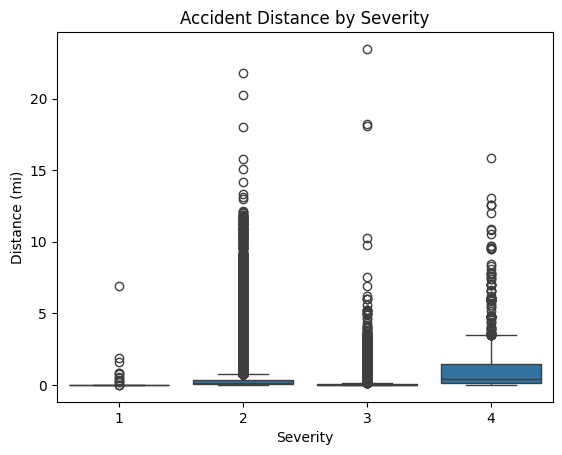

In [18]:
sns.boxplot(x='Severity', y='Distance(mi)', data=df)
plt.title('Accident Distance by Severity')
plt.xlabel('Severity')
plt.ylabel('Distance (mi)')
plt.show()



Severity 1 accidents have a tight distribution of distance, suggesting that when these accidents occur, the distance affected is consistently low.
Severity 2 and 3 accidents show a greater variation in the distance affected, with severity 2 having several outliers indicating some accidents affect a very long distance.
Severity 4 accidents seem to have a higher median distance affected than severity 1 and 3, and the spread is quite broad, but not as many outliers as severity 2. This could suggest that the most severe accidents consistently affect a larger distance.

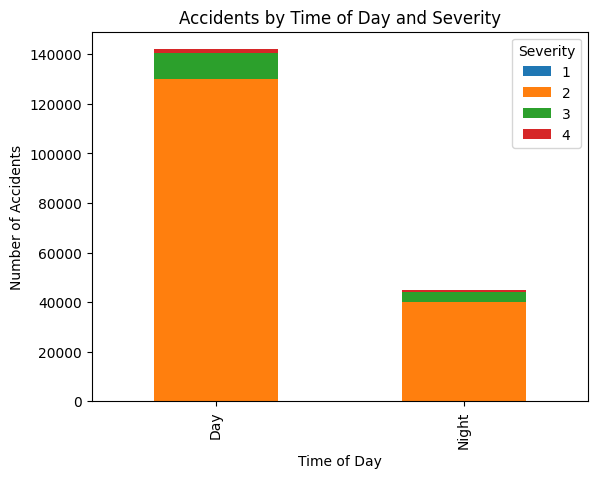

In [26]:
sunrise_sunset_severity = df.groupby(['Sunrise_Sunset', 'Severity']).size().unstack()
sunrise_sunset_severity.plot(kind='bar', stacked=True)
plt.title('Accidents by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


In [27]:
'''
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.set_index('Start_Time', inplace=True)


df.resample('M')['Severity'].mean().plot()
plt.title('Average Severity Over Time')
plt.xlabel('Time')
plt.ylabel('Average Severity')
plt.show()'''
#We have to change the format 

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 37237. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

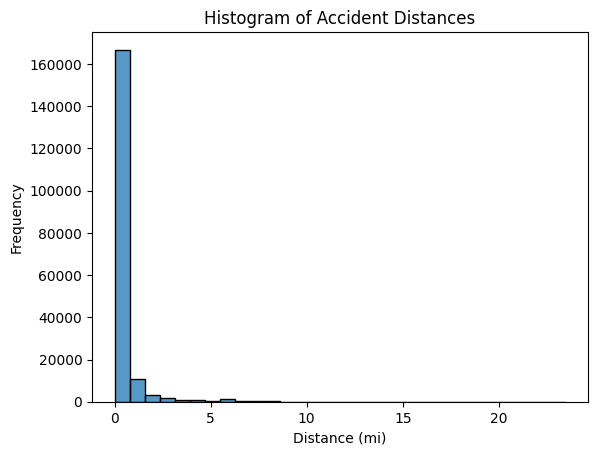

In [28]:
sns.histplot(df['Distance(mi)'], bins=30)
plt.title('Histogram of Accident Distances')
plt.xlabel('Distance (mi)')
plt.ylabel('Frequency')
plt.show()


High Frequency of Low-Distance Accidents: The first bar is much taller than the others, indicating that a significant number of accidents involved a very small distance. This could mean that most accidents are minor, with little to no movement of vehicles from their initial positions, or that the data is capturing many incidents where traffic wasn't affected over a large area.